![image.png](attachment:image.png)

# Huella dactilares

Hay que instalar:  
pip install fingerprint_enhancer

https://www.kaggle.com/code/dijorajsenroy/fingerprint-feature-extraction-for-biometrics/notebook  
https://www.mdpi.com/2076-3417/12/12/6122  
https://github.com/Utkarsh-Deshmukh/Fingerprint-Feature-Extraction

20/11/2023  
https://www.educative.io/answers/feature-matching-opencv  
https://hub.packtpub.com/fingerprint-detection-using-opencv/  
https://www.youtube.com/watch?v=IIvfqfKkiio
https://answers.opencv.org/question/26153/how-to-make-matching-by-minutiae/  
https://www.mdpi.com/2076-3417/12/12/6122  


In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import fingerprint_enhancer

import random
import skimage
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import PIL
from PIL import Image

Importamos la imagen

uint8


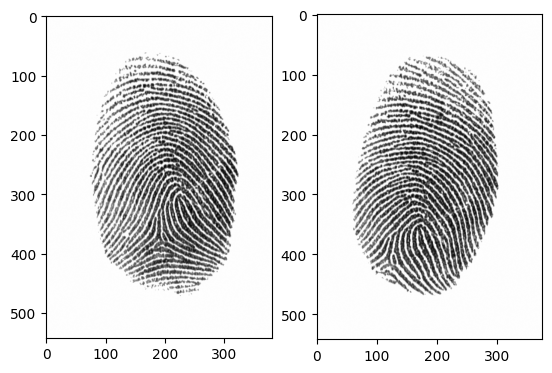

In [2]:
image = cv.imread('finger_print_01_01_C.bmp')
image2 = cv.imread('finger_print_01_02_C.bmp') # la misma que la anterior
#image2 = cv.imread('finger_print_06.bmp') #otra persona

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image2)
print(image.dtype)

# New Section

Mejoramos la imagen a partir de la Magnitud de la FFT

(542, 380, 3)
(542, 380)
uint8


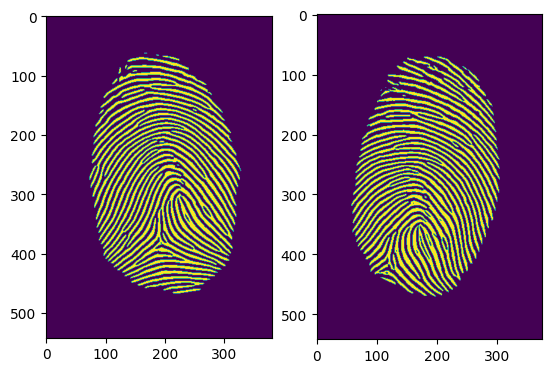

In [3]:
im1=fingerprint_enhancer.enhance_Fingerprint(image)
im2=fingerprint_enhancer.enhance_Fingerprint(image2)

plt.subplot(1,2,1)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.imshow(im2)

print(image.shape)
print(im1.shape)
print(image.dtype)

(542, 380)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
uint8
13.024859195960381


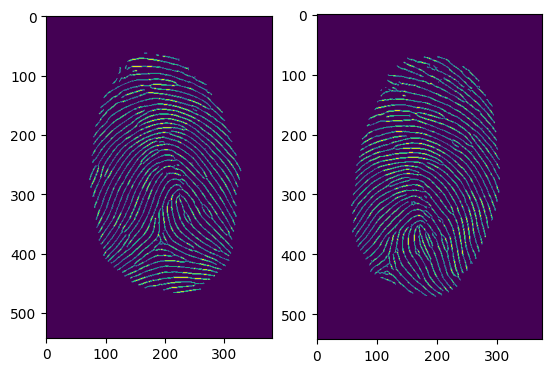

In [4]:
def esqueleto(img):
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    ret,img = cv.threshold(img,127,255,0)
    element = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
    done = False

    while( not done):
        eroded = cv.erode(img,element)
        temp = cv.dilate(eroded,element)
        temp = cv.subtract(img,temp)
        skel = cv.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv.countNonZero(img)
        if zeros==size:
            done = True
    return skel

im1_e = esqueleto(im1)
im2_e = esqueleto(im2)
plt.subplot(1,2,1)
plt.imshow(im1_e)
plt.subplot(1,2,2)
plt.imshow(im2_e)

print(im1_e.shape)
print(im1_e)
#print(im1_e[100])
#print(type(im1))
print(image.dtype)

THRESHOLD1 = im1_e.mean()
print(THRESHOLD1)


In [67]:
from skimage.feature import match_template

'''
def getTerminationBifurcation(img):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    count=0
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                    count+=1
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    print(count)
    return(minutiaeTerm, minutiaeBif)
'''
def getTerminationBifurcation(img, templater,templabif, threshold=0.95):
    #print(img.shape)
    minutiaeTerm = np.zeros((img.shape[0]-2,img.shape[1]-2))
    minutiaeBif = np.zeros((img.shape[0]-2,img.shape[1]-2))
    for template_name, template in templater.items():
        match = match_template(img, template)
        #print(match.shape)
        minutiaeTerm += (match >= threshold).astype(int)
        
    for template_name, template in templabif.items():
        match = match_template(img, template)
        minutiaeBif += (match >= threshold).astype(int)

    return minutiaeTerm,minutiaeBif

templater = {
    'termination_template1': np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]]),
    'termination_template2': np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]]),
    'termination_template3': np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]]),
    'termination_template4': np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]])
}

templabif = {
    'bifurcation_template1': np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]]),
    'bifurcation_template2': np.array([[0, 1, 0], [0, 1, 0], [1, 0, 1]]),
    'bifurcation_template3': np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]]),
    'bifurcation_template4': np.array([[0, 1, 0], [0, 1, 0], [1, 0, 1]]),
    'bifurcation_template5': np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1]]),
    'bifurcation_template6': np.array([[0, 0, 1], [1, 1, 0], [0, 0, 1]]),
    'bifurcation_template7': np.array([[1, 0, 0], [0, 1, 1], [1, 0, 0]]),
    'bifurcation_template8': np.array([[0, 1, 0], [1, 1, 0], [0, 1, 1]])
}

minutiaeTerm1,minutiaeBif1 = getTerminationBifurcation(im1_e,templater,templabif, 0.8)

######################################

#print(minutiaeBif1.shape)
#print(minutiaeTerm1.shape)

count_ones = np.sum(minutiaeBif1 > 0)
print(f"Number of bifurcations: {count_ones}")
count_ones = np.sum(minutiaeTerm1 > 0)
print(f"Number of terminations: {count_ones}")
'''
indicesBif1 = np.argwhere(minutiaeBif1 > 0)
print(indicesBif1[0,:])
x1, y1 = indicesBif1[33,:]
#x2, y2 = coord2

# Extracting surrounding 8 pixels for each coordinate in image1
surrounding_pixels1 = im1_e[x1 - 1:x1 + 2, y1 - 1:y1 + 2]

#print the coordinates and the surrounding pixels
print(f"Coords1: ({x1}, {y1})")
print("Surrounding pixels in image1:")
print(surrounding_pixels1)
plt.imshow(surrounding_pixels1)

BifLabel = skimage.measure.label(minutiaeBif1, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm1, connectivity=1);
ShowResults(im1_e, TermLabel, BifLabel)
'''


Number of bifurcations: 59
Number of terminations: 890


'\nindicesBif1 = np.argwhere(minutiaeBif1 > 0)\nprint(indicesBif1[0,:])\nx1, y1 = indicesBif1[33,:]\n#x2, y2 = coord2\n\n# Extracting surrounding 8 pixels for each coordinate in image1\nsurrounding_pixels1 = im1_e[x1 - 1:x1 + 2, y1 - 1:y1 + 2]\n\n#print the coordinates and the surrounding pixels\nprint(f"Coords1: ({x1}, {y1})")\nprint("Surrounding pixels in image1:")\nprint(surrounding_pixels1)\nplt.imshow(surrounding_pixels1)\n\nBifLabel = skimage.measure.label(minutiaeBif1, connectivity=1);\nTermLabel = skimage.measure.label(minutiaeTerm1, connectivity=1);\nShowResults(im1_e, TermLabel, BifLabel)\n'

In [21]:
def ShowResults(skel, TermLabel,BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 5);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));

    plt.figure(figsize=(10,10))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

Number of bifurcations: 59
Number of terminations: 890
[ 69 213]
Coords1: (298, 317)
Surrounding pixels in image1:
[[  0   0 255]
 [  0   0   0]
 [  0   0 255]]


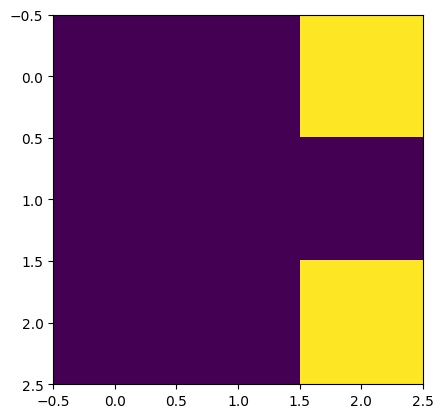

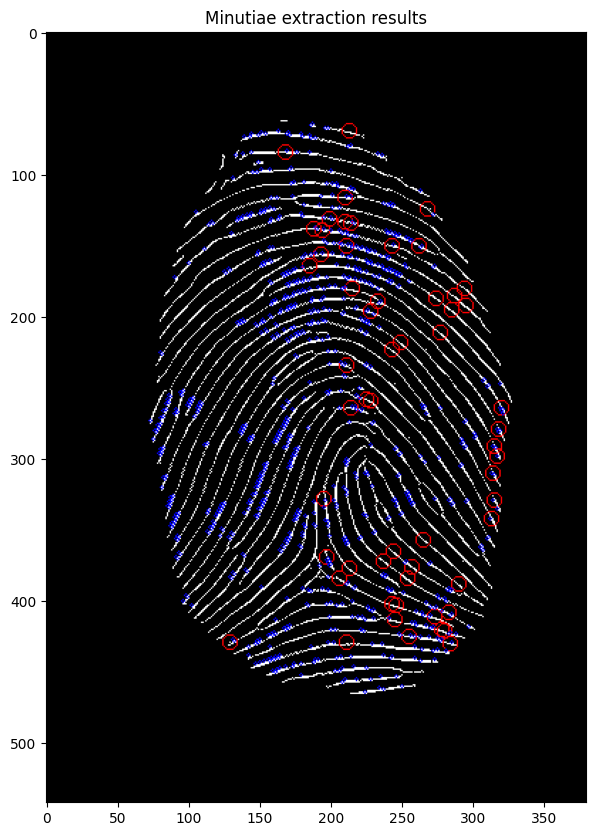

In [71]:

#THRESHOLD1 = image.mean()
#img1 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#img1 = np.array(img1 > THRESHOLD1).astype(int)

(minutiaeTerm1, minutiaeBif1) = getTerminationBifurcation(im1_e,templater,templabif, 0.8)

#print(minutiaeBif.shape)
#print(minutiaeTerm.shape)
plt.imshow(minutiaeBif1)

count_ones = np.sum(minutiaeBif1 > 0)
print(f"Number of bifurcations: {count_ones}")
count_ones = np.sum(minutiaeTerm1 > 0)
print(f"Number of terminations: {count_ones}")

indicesBif1 = np.argwhere(minutiaeBif1 > 0)
print(indicesBif1[0,:])
x1, y1 = indicesBif1[33,:]
#x2, y2 = coord2

# Extracting surrounding 8 pixels for each coordinate in image1
surrounding_pixels1 = im1_e[x1 - 1:x1 + 2, y1 - 1:y1 + 2]

#print the coordinates and the surrounding pixels
print(f"Coords1: ({x1}, {y1})")
print("Surrounding pixels in image1:")
print(surrounding_pixels1)
plt.imshow(surrounding_pixels1)

BifLabel = skimage.measure.label(minutiaeBif1, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm1, connectivity=1);
ShowResults(im1_e, TermLabel, BifLabel)


In [72]:
THRESHOLD1 = image2.mean()
img2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
img2 = np.array(img2 > THRESHOLD1).astype(int)

(minutiaeTerm2, minutiaeBif2) = getTerminationBifurcation(im2_e,templater,templabif, 0.8)

count_ones = np.sum(minutiaeBif2>0)
print(f"Number of bifurcations: {count_ones}")
count_ones = np.sum(minutiaeTerm2>0)
print(f"Number of terminations: {count_ones}")

#BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
#TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
#ShowResults(skel, TermLabel, BifLabel)

Number of bifurcations: 25
Number of terminations: 282


In [94]:
indicesTerm1 = np.argwhere(minutiaeTerm1 == 1)
#x_coords = indices[:, 0]
#y_coords = indices[:, 1]
#print("Indices of terminations:")
#print(indicesTerm)
#print(indicesTerm.shape)

indicesBif1 = np.argwhere(minutiaeBif1 == 1)
indicesTerm2 = np.argwhere(minutiaeTerm2 == 1)
indicesBif2 = np.argwhere(minutiaeBif2 == 1)

#Pixel-wise Mean Squared Error (MSE)
def mean_squared_error(patch1, patch2, threshold = 0.1):
    assert patch1.shape == (3, 3) and patch2.shape == (3, 3), "Patches must be 3x3"
    squared_diff = (patch1 - patch2) ** 2

    # Calculate mean squared error
    mse = np.mean(squared_diff)
    if mse < threshold:
        return True, mse
    return False, mse

def zero_mean_cross_correlation(patch1, patch2, threshold = 0.9):
    assert patch1.shape == (3, 3) and patch2.shape == (3, 3), "Patches must be 3x3"

    # Calculate means of the patches
    mean_patch1 = np.mean(patch1)
    mean_patch2 = np.mean(patch2)

    # Calculate zero-mean patches
    zero_mean_patch1 = patch1 - mean_patch1
    zero_mean_patch2 = patch2 - mean_patch2

    # Calculate cross-correlation
    numerator = np.sum(zero_mean_patch1 * zero_mean_patch2)
    denominator = np.sqrt(np.sum(zero_mean_patch1 ** 2) * np.sum(zero_mean_patch2 ** 2))
    zncc = numerator / denominator if denominator != 0 else 0

    decision = True if zncc >= threshold else False
    return decision , zncc


def compare_pixels(square1,square2,threshold):
    return mean_squared_error(square1, square2, threshold)
    #return zero_mean_cross_correlation(square1, square2, threshold)

def compare_coordinates(coords1, coords2, image1, image2,threshold):
    count = 0
    for coord1 in coords1:
        for coord2 in coords2:
            x1, y1 = coord1
            x2, y2 = coord2
            
            # Extracting surrounding 8 pixels for each coordinate in image1
            surrounding_pixels1 = image1[x1 - 1:x1 + 2, y1 - 1:y1 + 2]
            # Extracting surrounding 8 pixels for each coordinate in image2
            surrounding_pixels2 = image2[x2 - 1:x2 + 2, y2 - 1:y2 + 2]
            #print(compare_pixels(surrounding_pixels1,surrounding_pixels2,threshold))
            dec,val = compare_pixels(surrounding_pixels1,surrounding_pixels2,threshold)
            if dec:
                count+=1
    return count
            

# Call the function with your coordinate vectors and images
#print(indicesBif1[:2,:])
threshold = 0.1 #for mse, 0.9 for zero mean cross
count = compare_coordinates(indicesBif1[:,:], indicesBif2[:,:], im1_e, im2_e,threshold)
print(count)

126


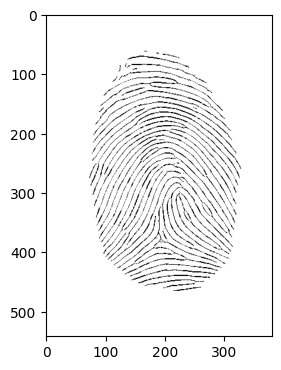

In [83]:
#--- gio code
# alpha transparent

# Converte l'immagine in scala di grigi
gray_im = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


# applica mask ezqueleto
# Applica la maschera all'immagine
mask = im1_e
result = cv.bitwise_and(image, image, mask=mask)


# Applica una soglia per separare lo sfondo dal motivo, cv.threshold(	src, thresh, maxval, type[, dst])
_, thresh = cv.threshold(result, 1, 255, cv.THRESH_BINARY_INV)



result_with_alpha = cv.cvtColor(thresh, cv.COLOR_RGB2BGRA)


# Normalizza la maschera per il canale alfa (assicurandoti che sia in [0, 1])
alpha = mask.astype(np.float32) / 255.0

# Assegna la maschera normalizzata al canale alfa dell'immagine RGBA
result_with_alpha[..., 3] = alpha






# Crea un'immagine con canale alfa
#image_alpha = cv.cvtColor(im1, cv.COLOR_BGR2BGRA)

# Imposta l'alfa a 0 per i pixel corrispondenti allo sfondo
#image_alpha[:, :, 3] = thresh

# Salva l'immagine risultante
#cv2.imwrite('output.png', image_alpha)

plt.subplot(1,2,1)
plt.imshow(thresh)

#print(result_with_alpha)
#print(result_with_alpha.shape)

In [ ]:
print(im1_e.shape)

Se reduce el ancho de las líneas para obtener la imagen esqueletizada:

Usamos Sift para encontrar las minucias

In [ ]:
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(im1_e, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(im2_e, None)
img_kp1 = im1_e.copy()
img_kp2 = im2_e.copy()
x_v = np.zeros(len(keypoints_1))
y_v = np.zeros(len(keypoints_1))
i=0

for kp in keypoints_1:
    x, y = kp.pt
    x_v[i] = x
    y_v[i] = y
    x=int(round(x))
    y=int(round(y))
    i=i+1
    cv.drawMarker(img_kp1,(x,y),(255,0,255),markerType=cv.MARKER_DIAMOND,markerSize=5,thickness=5,line_type=cv.LINE_8)

x_v2 = np.zeros(len(keypoints_2))
y_v2 = np.zeros(len(keypoints_2))
i=0
for kp in keypoints_2:
    x, y = kp.pt
    x_v2[i] = x
    y_v2[i] = y
    x=int(round(x))
    y=int(round(y))
    i=i+1
    cv.drawMarker(img_kp2,(x,y),(255,0,255),markerType=cv.MARKER_DIAMOND,markerSize=5,thickness=5,line_type=cv.LINE_8)


plt.subplot(1,2,1)
plt.imshow(img_kp1)
plt.subplot(1,2,2)
plt.imshow(img_kp2)


In [ ]:
#print(keypoints_1)

In [ ]:
print(len(keypoints_1))


Aquí como problema, quedarnos con los puntos que sean significativos.

Comprobamos la similitud:

In [ ]:
def radio2(tx, ty, qx, qy):
    rad = 15  # 15
    vectorx1 = []
    vectory1 = []
    vectorx2 = []
    vectory2 = []
    emparejados = 0

    for i in range(len(tx)):
        dist = np.sqrt((tx[i] - qx)**2 + (ty[i] - qy)**2)
        valor = np.min(dist)  # El valor mínimo
        indice = np.where(dist == valor)[0]  # Posición del mínimo

        if valor < rad:
            vectorx1.append(tx[i])
            vectory1.append(ty[i])
            vectorx2.append(qx[indice[0]])
            vectory2.append(qy[indice[0]])

            qx[indice[0]] = 1000
            qy[indice[0]] = 1000
            emparejados += 1

    out = (2 * emparejados) / (len(tx) + len(qx))
    return out

In [ ]:

def Hough(tx,ty,qx,qy):
# Supongamos que tienes las listas tx, ty, qx, y qy definidas previamente

# Inicializa una matriz de similitud con ceros
    similitud = np.zeros((len(tx), len(qx)))

# Calcular la similitud
    for i in range(len(tx)):
        desp_x = tx[i] - (qx)
        desp_y = ty[i] - (qy)

        for j in range(len(desp_x)):
            nuevo_qx = qx + desp_x[j]
            nuevo_qy = qy + desp_y[j]

            similitud[i, j] = radio2(tx, ty, nuevo_qx, nuevo_qy)

# Encuentra el valor máximo en la matriz de similitud
    out = np.max(similitud)
    return out



score= Hough(x_v,y_v,x_v2,y_v2)
print(score)

# --- Gio ---

In [ ]:
x_v = np.zeros(len(keypoints_1))
y_v = np.zeros(len(keypoints_1))
i=0

for kp in keypoints_1:
    x, y = kp.pt
    x_v[i] = x
    y_v[i] = y
    x=int(round(x))
    y=int(round(y))
    i=i+1
    cv.drawMarker(img_kp1,(x,y),(255,0,255),markerType=cv.MARKER_DIAMOND,markerSize=5,thickness=5,line_type=cv.LINE_8)
    print(x,y)


In [ ]:
ipotesi
metodologia

risultato
grafico resultado
errore

conclusione

lista fonti consultate